In [2]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)

In [14]:
path.ls()

(#2) [Path('C:/Users/ASUS/.fastai/data/mnist_png/testing'),Path('C:/Users/ASUS/.fastai/data/mnist_png/training')]

# resnet 18

In [15]:
# 使用路径创建一个图像数据转换器对象
dls = ImageDataLoaders.from_folder(path, train='training', 
                                   valid='testing')
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(),  #标签平滑
                    metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.561522,0.526307,0.991500,12:55


epoch,train_loss,valid_loss,accuracy,time
0,0.559923,0.525104,0.990900,10:18
1,0.548604,0.524869,0.991600,10:19
2,0.549611,0.524795,0.991000,10:22


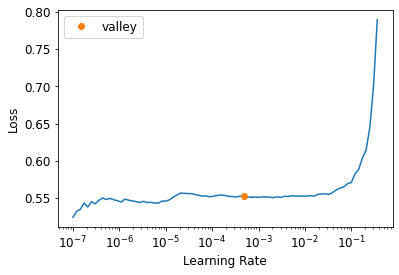

In [20]:
learn.unfreeze()
learn.lr_find()
learn.fit_one_cycle(3, slice(1e-6, 1e-4))

In [17]:
# examine the model, including its layers
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 7 x 7     
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                        

# resnet 34 

In [4]:
# 使用路径创建一个图像数据转换器对象
dls = ImageDataLoaders.from_folder(path, train='training', 
                                   valid='testing')
learn = cnn_learner(dls, resnet34, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(),  #标签平滑
                    metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.583426,0.594473,0.986200,22:21


epoch,train_loss,valid_loss,accuracy,time
0,0.578651,0.543047,0.987100,16:14
1,0.581934,2.380104,0.983400,16:49


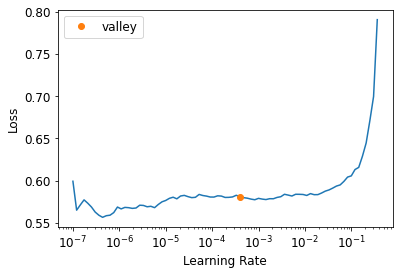

In [5]:
learn.unfreeze()
learn.lr_find()
learn.fit_one_cycle(2, slice(1e-6, 1e-4))